# Lab Week 3 - Logistic Regression

## EXERCISE: Predicting Survival on the Titanic

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In [2]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived
#X.head()
y.head()


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [10]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

In [12]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


In [13]:
# TASK 6: add Age as a feature and calculate testing accuracy
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred_class))


0.686098654709


In [14]:
# TASK 7 : Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print (metrics.confusion_matrix(y_test, y_pred_class))

[[112  16]
 [ 54  41]]


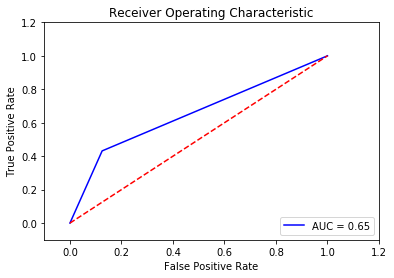

In [15]:
# TASK 8: Generate the ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate,threshold=roc_curve(y_test,y_pred_class)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
titanic.Fare.isnull().sum()

In [ ]:
# TASK 9: What variables should we include in the model to improve it?
#Included Fare variable
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
feature_cols = ['Pclass', 'Parch', 'Age','Fare']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred_class))
#Accuracy score reduced

In [16]:
#Introducing Gender Variable
titanic.Sex.isnull().sum()
#Encoding gender variable
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender=LabelEncoder()
titanic.Sex=labelEncoder_gender.fit_transform(titanic.Sex)
feature_cols = ['Pclass', 'Parch', 'Age','Sex']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
y_pred_class = logreg.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred_class))

0.793721973094


In [17]:
from sklearn import metrics
prds = logreg.predict(X)
print (metrics.confusion_matrix(y_test, y_pred_class))

[[113  15]
 [ 31  64]]


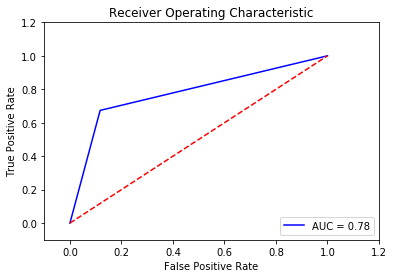

In [18]:
# TASK 8: Generate the ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate,threshold=roc_curve(y_test,y_pred_class)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
# Task 10: Try a different classification algorithm like Naive Bayes or Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
labelEncoder_gender=LabelEncoder()
titanic.Sex=labelEncoder_gender.fit_transform(titanic.Sex)
feature_cols = ['Pclass', 'Parch','Age','Sex']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
classifier=KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(X_train,y_train)
#Predict
y_pred=classifier.predict(X_test)
#accuracy score
print( metrics.accuracy_score(y_test, y_pred))

0.717488789238


In [21]:
from sklearn import metrics
prds = logreg.predict(X)
print (metrics.confusion_matrix(y_test, y_pred))

[[109  19]
 [ 44  51]]


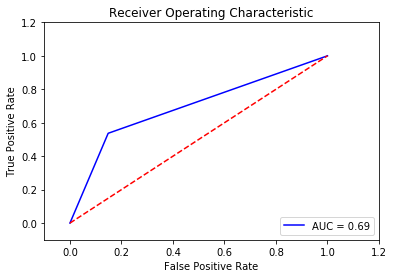

In [22]:
# TASK 8: Generate the ROC Curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate,threshold=roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()